# Projeto Árvore de Decisão
## Nivel de adaptação do estudante online.

# Método

Trabalhando com base em nosso DataFrame selecionado, optei por realizar o modelo de árvore de decisão, afinal o modelo pode lidar com grandes conjuntos de dados e pode prever variáveis binárias categóricas e quantitativas. O algoritmo foi criado em 1983 por J. Ross Quinlan e por isso é conhecido como o "Pai das Árvores de Decisão". Uma árvore de decisão é uma representação visual de todos os caminhos de ação possíveis que uma pessoa pode seguir para tomar uma decisão. Ou seja, é uma ferramenta de representação visual que pode auxiliar na tomada de decisões, orientando diferentes caminhos.

Uma árvore de decisão consiste em várias formas gráficas (símbolos), muito semelhante a um fluxograma. Esses símbolos formam nós e ramos que dão forma à árvore e organizam os caminhos a serem seguidos pelas decisões. Um nó pode corresponder a uma ação, probabilidade, condição ou decisão a ser tomada. Ramificações representam caminhos que podem ser seguidos, ou seja, links entre nós. Normalmente, as árvores de decisão começam com um único nó, raiz, que se ramifica para outros nós contendo possíveis opções ou resultados. Cada uma dessas ramificações leva a outros nós que são subdivididos em outros nós filhos. Esse comportamento se repete até que todas as possibilidades sejam mapeadas, resultando em uma estrutura em árvore.

Comumente, as árvores de decisão são construídas horizontalmente, começando no lado esquerdo da página e movendo-se para a direita, mas algumas pessoas preferem construir verticalmente, de cima para baixo. O importante aqui é que a árvore seja construída de forma hierárquica, ou seja, as dependências entre os nós são bem definidas, claras e seguem a ordem dos eventos.

## Bibliotecas Utilizadas:

Bibliotecas pandas para leitura, implentação e tratamento dos dados, árvore de decisão para filtrar o texto e sklearn como base para gerar treino, teste e predict.

In [3]:
#Importações árvore de decisão
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

## Leitura e visualização do Dataset.

In [4]:
#Implementação do documento csv.
df = pd.read_csv('students_adaptability_level_online_education.csv')
#Visualiazação dos dados.
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


## Preparação e entendimento dos dados.

In [5]:
#Verificação o tipo dos dados.
df.dtypes
#Verificando se existem dados ausentes.
df.info()
# Verificando qual a soma total de dados ausentes.
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Para maior entendimento dos dados vizualizamos as categorias, podemos observar que todos se encontram definidos como **object** isso precisara ser tratado e transfomado em **int64**.
Tambem observamos que em nosso conjunto de dados não existe dados categorizados como null, ou seja, não temos dados nulos que precisariam ser tratados.


Para que possamos seguir com a criação do modelo precisamos transformar nossos dados **object** em **int64** como dito acima, para isso usaremos o método **factorize** e transformaremos nossos dados textuais em númericos definidos em categorias iniadas com 0.

In [6]:
#Transformando os dados não númericos em númericos.
df = df[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']].apply(lambda x: pd.factorize(x)[0])
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,1,1,0
2,1,1,1,1,0,0,0,0,0,0,0,1,0
3,1,2,2,0,0,0,0,0,1,0,0,1,0
4,1,1,2,0,0,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,1,0,0,0,0,0,0,0,0,1,1
1201,1,1,1,0,0,1,1,0,0,0,0,1,0
1202,0,2,2,0,0,0,0,0,1,1,0,1,0
1203,1,1,1,0,0,1,0,0,0,0,0,1,1


In [7]:
#Definindo X e y
X = df[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device']]
y = df['Adaptivity Level']

## Modelagem Árvore de Decisão

In [8]:
#Define quantos % serão utilizados 
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.30)

In [9]:
#Criterios para medidas comuns de impureza da árvore de decisão (Classificação)
arvore = DecisionTreeClassifier()

parameters = {'criterion':('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': (None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}

grid = GridSearchCV(arvore, parameters)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.8674033149171271

Para melhor analise dos dados e desempenho do modelo farei usso de todos os parametros fornecidos pela biblioteca, meu modelo fara uma avaliação de todos os criterios e avalia qual o melhor para que a árvore tenha um bom resultado. 
**OBS:** Esses criterios são usados para medidas comuns de impureza do tipo de classificação no modelo da árvore.

In [10]:
criterion = ['gini', 'entropy', 'log_loss']
max_depths = list(range(1, 20))
param_grid = dict(criterion=criterion, max_depth=max_depths)
dtc = DecisionTreeClassifier()
dtc = GridSearchCV(dtc, param_grid, scoring='accuracy')
dtc.fit(X_train, y_train)
print(dtc.best_params_)

{'criterion': 'gini', 'max_depth': 12}


Nesse caso os melhores criterios avaliados pelo modelo será Gini, max_depth e 14.
**OBS:** O criterio númerico terá alterações a cada vez que o modelo for regerado.

## Resultados

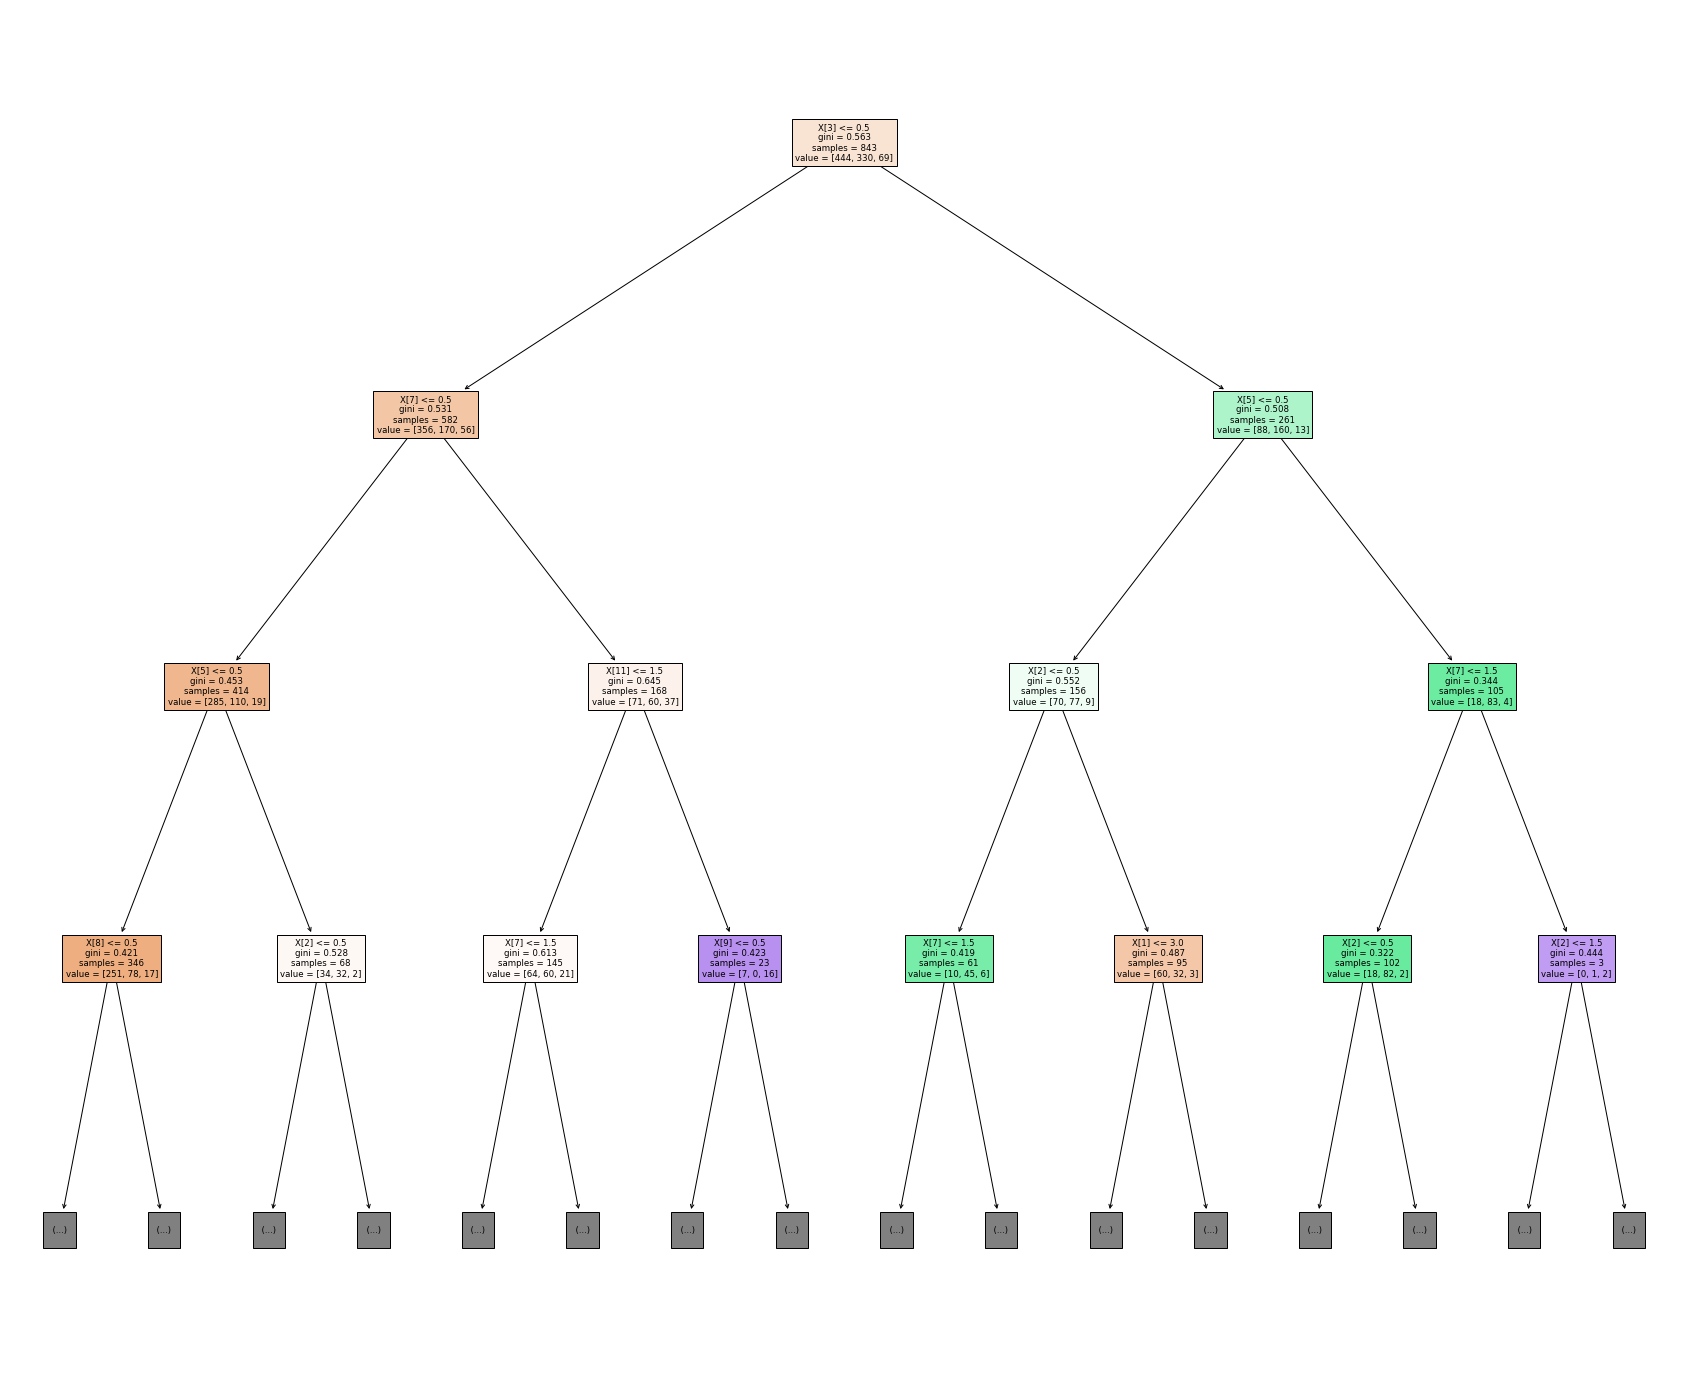

In [11]:
# Gera a Imagem da árvore
fig = plt.figure(figsize=(30,25)) #Aumentar a fonte da figura
arvore_bonitinha = tree.plot_tree(grid.best_estimator_, filled=True, max_depth=3)
plt.show()
#Salva a imagem nos documentos
#fig.savefig('Árvore_Online_Estudantes.pdf')

Diagarma do inicio da árvore de decisão.

A árvore de decisão é construída de forma hierárquica, ou seja, as dependências entre os nós são bem definidas, claras e seguem a ordem dos eventos.

In [12]:
dtc_param = pd.DataFrame(dtc.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
dtc_param['params'] = dtc_param['params'].astype('string')
novo = dtc_param['params'].str.split(',', expand=True)
dtc_param['criterion'] = novo[0]
dtc_param['max_depth'] = novo[1]
dtc_param['criterion'] = dtc_param['criterion'].replace("{'criterion': '", '', regex=True)
dtc_param['criterion'] = dtc_param['criterion'].replace("'", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].replace("'max_depth': ", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].replace("}", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].astype('int')
dtc_param.drop('params', axis=1, inplace=True)

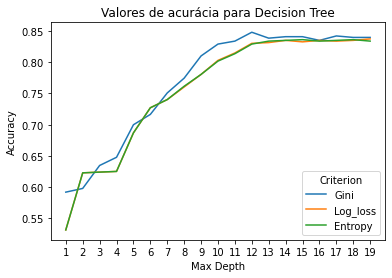

In [13]:
sns.lineplot(data=dtc_param, x='max_depth', y='mean_test_score', hue='criterion')
plt.title('Valores de acurácia para Decision Tree')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(max_depths)
plt.legend(title='Criterion', labels=['Gini', 'Log_loss', 'Entropy'], loc='lower right')
plt.show()

Medido pelo índice de Gini desenvolvido por Conrado Gini em 1912 heterogeneidade de dados. Portanto, pode ser usado para medir uma impureza existente.

Quando o índice é igual a 0 o nó é um nó puro. Por outro lado, quando mais próximo o valor chega de 1 o nó é impuro, analisando nossa árvore, podemos observar que seus valores, mesmo sendo bons índices para um olheiro, não são agradeveis para o desempenho do modelo e um expecialista, afinal nossa acuracia chega perto de 1 atingindo 0,87%. Ou seja, analisando os dados fornecidos no dataset e pretendendo medir o nivel de adaptação dos estudantes.

## Métricas

In [14]:
#Implementação do método ".predict"
y_pred = grid.predict(X_test)

#Mostra precision, recall, fi-score, support, accuracy, macro avg, weighted avg
target_names = ['Moderate', 'Low', 'High']
print(classification_report(y_test, y_pred, target_names=target_names))
#0-Moderate 1-Low 2-High

              precision    recall  f1-score   support

    Moderate       0.84      0.92      0.88       181
         Low       0.90      0.85      0.88       150
        High       0.87      0.65      0.74        31

    accuracy                           0.87       362
   macro avg       0.87      0.81      0.83       362
weighted avg       0.87      0.87      0.87       362



## Matriz de confusão

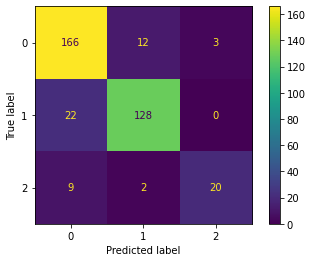

In [15]:
#Cria o gráfico da matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.rc('font', size=10) # bigger font sizes
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Interpretação matriz de confusão - Árvore de decisão.

**Classe moderada (0)**

Em uma matriz de 3 dimensões as interpretações dos dados será feita de forma diferente.

**TP/VP - Verdadeiro positivo.**

O valor real e o valor previsto devem ser os mesmos. (0,0) Assim, em relação à classe Moderate (0), o valor da célula 1 é o valor TP. **161 em Amarelo**.

**FN/FN - Falso negativo.**

Para relalizar o entendimento dos valores falsos negativos temos que realizar uma conta simples, precisamos somar a célula 2 e célula 3 assim sento. **16+1 = 17** Valores previstos como falsos negativos.

**FP/FP - Falso positivo.**

Assim como o Falso negativo para entender o resultado falso positivo tambem é necessario fazer uma conta simples. Onde somamos célula 4 + célula 7 assim sendo. **19+6 = 25** Valores previstos como falsos positivos.

**TN/VN - Verdadeiro negativo.**

A soma feita para o entendimento dos valores verdadeiros negativos por mais que simples comparada as anteriores será denominada de conta maior. Sendo célula5 + célula6 + célula8 + célula9, ou seja. **132+2+3+22 = 159** Valores previstos como verdadeiros negativos.

**Classe baixa (1)**

**TP:** Valor da célula 5. **132 em verde**.

**FN:** Soma das célula4 + célula6. **19+2 = 21** Valores previstos como falsos negativos.

**FP:** Soma das célula2 + célula8. **16+3 = 19** Valores previstos como falsos positivos.

**TN:** Soma maior das célula1 + célula3 + célula7 + célula9. **161+1+6+22 = 190** Valores previstos como Verdadeiros positivos. 

**Classe alta (2)**

**TP:** Valor da célula 9. **22 em violeta**.

**FN:** Soma das célula7 + célula8. **6+3 = 9** Valores previstos como falsos negativos.

**FP:** Soma das célula3 + célula6. **1+2 = 3** Valores previstos como falsos positivos.

**TN:** Soma maior das célula1 + célula2 + célula4 + célula5. **161+16+19+132 = 328** Valores previstos como Verdadeiros positivos. 

Em análise geral para todas as classes vemos que por mais que o modelo árvore de decisão tenha suas vantagens não analisa muito bem nossos dados, como vimos anteriormente nossa acuracia se aproxima de 1 sendo 0,8 o que não é bom para o modelo, o ideal seria se manter mais proximo de 0 e podemos comprovar isso com os dados Verdadeiros negativos obtidos na matriz de confusão onde esses valores são bem autos chegando ate a 328 por exemplo.

# Vantagens e Desvantagens

## Vantagens
Facilidade de compreensão;
Podem ser úteis com ou sem dados concretos, e quaisquer dados requerem o mínimo de preparação;
Novas opções podem ser adicionadas às árvores existentes
Seu valor pode ser escolhido dentre a melhor opções

## Desvantagens
Árvores de decisão podem se tornar excessivamente complexas. Em tais casos, um diagrama de influência mais compacto pode ser uma boa alternativa. Diagramas de influência focam em decisões mais críticas, entradas e objetivos.

## Limitaçõs - Árvore.
**NAN**

# Joblib

In [16]:
from joblib import dump

In [17]:
# dump(knn, 'knn.joblib')
# dump(log_reg, 'log_reg.joblib')
# dump(svc, 'svc.joblib')
dump(dtc, 'dtc.joblib')
dump(X_test, 'X.joblib')
dump(y_test, 'y.joblib');

# Referências
https://ferramentasdaqualidade.org/arvores-decisorias/.

https://en.wikipedia.org/wiki/Decision_tree.

https://www.digitalhouse.com/br/blog/arvore-de-decisao/.

https://www.digitalhouse.com/br/blog/arvore-de-decisao/.

https://scikit-learn.org/stable/modules/tree.html.

https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/.